## Car Price Prediction 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv(r'D:\ML\Machine_Learning\ML_files\Data sets\tips\cardata.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

## Data Cleaning

In [6]:
# check for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# check for duplicated values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [8]:
# columns types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

## Data Visualization

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


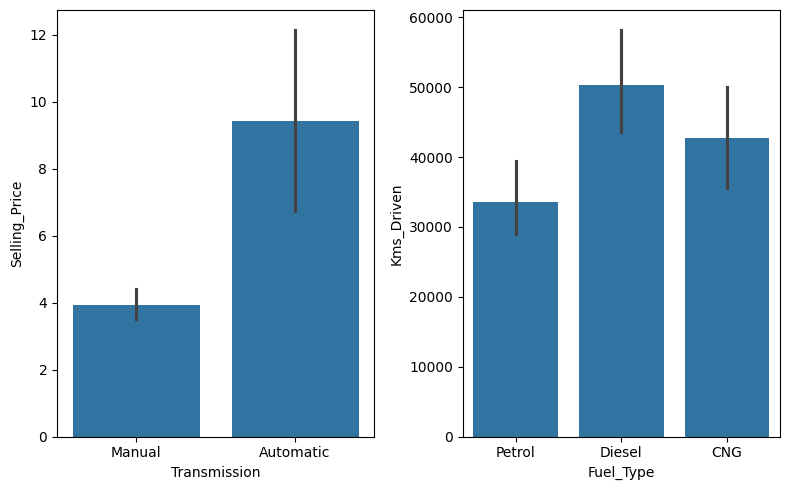

In [12]:
fig,ax = plt.subplots(1,2,figsize=(8,5))
sns.barplot(data=df,x='Transmission',y='Selling_Price',ax=ax[0])
sns.barplot(data=df,x='Fuel_Type',y='Kms_Driven',ax=ax[1])

plt.tight_layout()
plt.show()

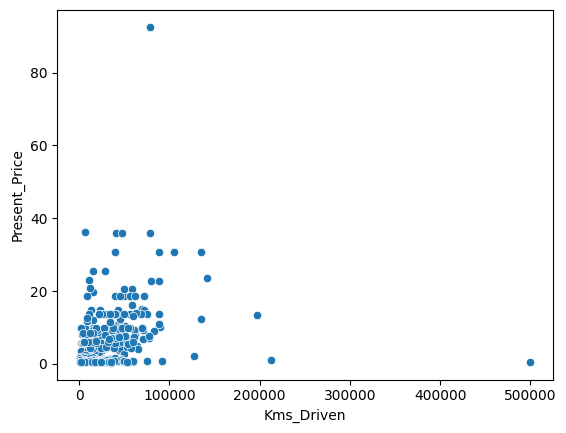

In [13]:
sns.scatterplot(data=df,x='Kms_Driven',y='Present_Price')
plt.show()

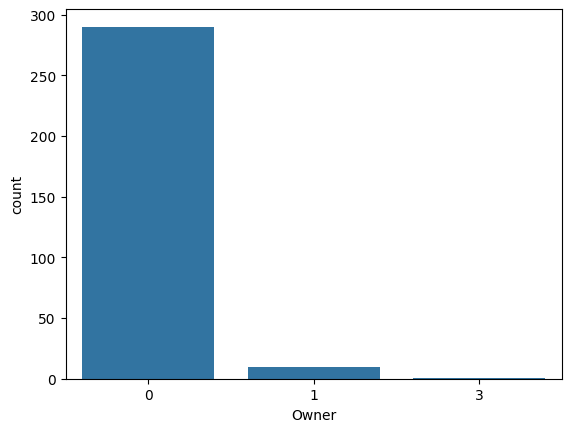

In [14]:
sns.countplot(data=df,x='Owner')
plt.show()

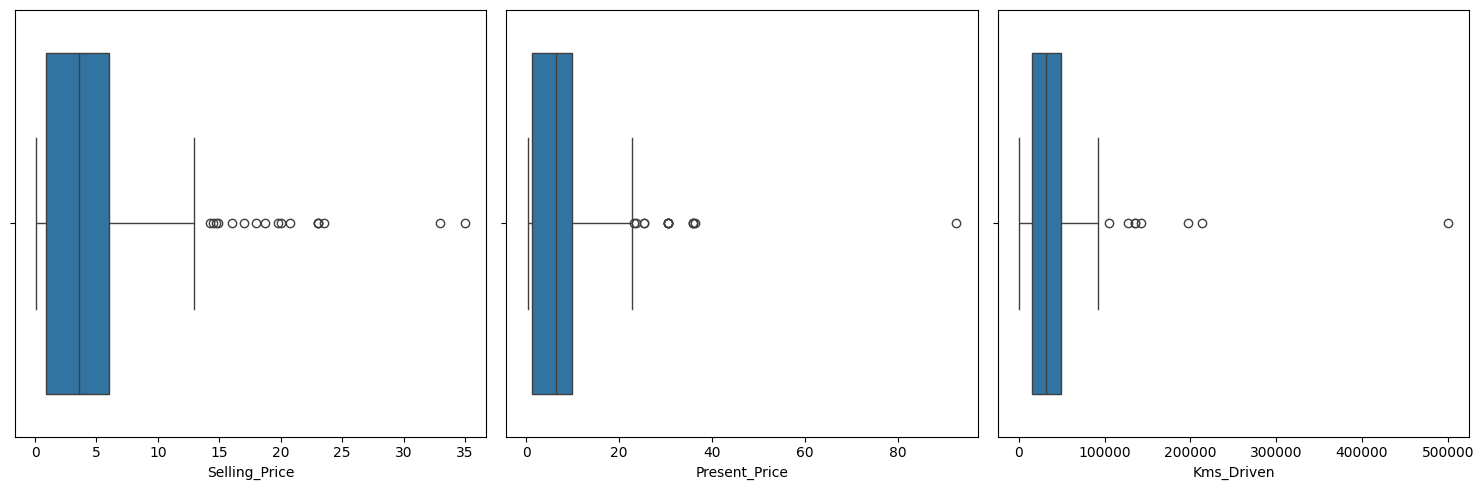

In [15]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=df,x='Selling_Price',ax=ax[0])
sns.boxplot(data=df,x='Present_Price',ax=ax[1])
sns.boxplot(data=df,x='Kms_Driven',ax=ax[2])

plt.tight_layout()
plt.show()

In [16]:
# removing outliers

def remove_outliers(col):

    d25=df[col].quantile(0.25)
    d75=df[col].quantile(0.75)
    diqr=d75-d25
    upper_lim=d75+1.5*diqr
    lower_lim=d25-1.5*diqr
    filter_df=df[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ]
    return filter_df

df=remove_outliers('Selling_Price')
df=remove_outliers('Present_Price')
df=remove_outliers('Kms_Driven')

## Data Preprocessing

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
# dropping unnecessary columns
df.drop(columns=['Year'],inplace=True)

## Model Building

In [19]:
encoder = LabelEncoder()

df['Car_Name'] = encoder.fit_transform(df['Car_Name'])

df['Fuel_Type'] = encoder.fit_transform(df['Fuel_Type'])

df['Seller_Type'] = encoder.fit_transform(df['Seller_Type'])

df['Transmission'] = encoder.fit_transform(df['Transmission'])

In [20]:
X = df.drop(columns='Selling_Price')
X = X.values

y = df['Selling_Price'].values.flatten()

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [22]:
tree = DecisionTreeRegressor(criterion='poisson',splitter='best',max_depth=5,min_samples_split=5,)
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
accuracy = r2_score(y_test,tree_pred)
print(f"Accuracy is: {accuracy}")

Accuracy is: 0.8821781741549928
